In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow[and-cuda]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.8/417.8 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 51.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 845.8/845.8 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.1/720.1 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.3/195.3 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 62.3 MB/s eta 0:00:00
  Preparing metadata (s

In [ ]:
!pip install tensorrt

  Using cached tensorrt-8.6.1.post1.tar.gz (18 kB)
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user


In [ ]:
!dpkg -l | grep TensorRT

In [ ]:
!python preprocess.py

In [ ]:
!python inv_target.py

In [ ]:
!python hyperparameter_opt.py

2024-03-21 11:49:31.785704: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-21 11:49:33.362079: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
80                |80                |units
1                 |1                 |layers
tanh  

In [ ]:
!python hyperparameter_opt.py

2024-03-21 14:58:46.422378: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Shape of training data: X (3996, 4, 15), y (3996, 1)
Shape of testing data: X (996, 4, 15), y (996, 1)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
11                |11                |units
3                 |3                 |layers
tanh              |tanh              |activation function
0.01              |0.01              |learning rate

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0925 - mae: 0.2079 - val_loss: 0.0355 - val_mae: 0.1302
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0323 - mae: 0.1320 - val

PSO OPTIMIZATION

In [ ]:
import numpy as np
from hyperparameter_opt import preprocess
from hyperparameter_opt import output_path, data_path, QUANTITY, SEQ_LEN, FUTURE, MAX_TRIALS, PATIENCE, EPOCHS, preprocess
from inv_target import inv_target
import pandas as pd
from sklearn.metrics import mean_squared_error

class Particle:
    def __init__(self, position, velocity):
        self.position = position
        self.velocity = velocity
        self.best_position = position
        self.best_fitness = float('inf')

class PSOOptimizer:
    def __init__(self, num_particles, num_dimensions, max_iterations, scaler, X_val, y_val, model):
        self.num_particles = num_particles
        self.num_dimensions = num_dimensions
        self.max_iterations = max_iterations
        self.scaler = scaler
        self.X_val = X_val
        self.y_val = y_val
        self.model = model
        self.swarm = self.initialize_swarm()

    def initialize_swarm(self):
        # Initialize the swarm with random positions and velocities
        swarm = [Particle(position=np.random.rand(self.num_dimensions),
                          velocity=np.random.rand(self.num_dimensions))
                 for _ in range(self.num_particles)]
        return swarm

    def optimize(self):
        for iteration in range(self.max_iterations):
            for particle in self.swarm:
                # Update particle's position and velocity based on PSO rules
                self.update_particle(particle)
                fitness = self.evaluate_fitness(particle.position)
                if fitness < particle.best_fitness:
                    particle.best_fitness = fitness
                    particle.best_position = particle.position

    def update_particle(self, particle):
        # Update particle's velocity and position based on PSO rules
        inertia_weight = 0.5
        cognitive_weight = 1.0
        social_weight = 2.0

        r1, r2 = np.random.rand(), np.random.rand()
        particle.velocity = (inertia_weight * particle.velocity +
                             cognitive_weight * r1 * (particle.best_position - particle.position) +
                             social_weight * r2 * (self.get_global_best().position - particle.position))
        particle.position += particle.velocity

    def get_global_best(self):
        # Find the particle with the best fitness in the swarm
        return min(self.swarm, key=lambda x: x.best_fitness)

    def evaluate_fitness(self, position):
        # Evaluate fitness based on model predictions and target values
        optimized_preds = self.model.predict(np.array([position]))  # Assuming model.predict() is available
        inv_preds, inv_y_val = inv_target(self.X_val, optimized_preds, self.y_val, self.scaler)
        # Calculate fitness based on the difference between predicted and actual values
        fitness = mean_squared_error(inv_preds, inv_y_val)  # Example fitness metric, change as needed
        return fitness

def run_pso_optimization():
    # Load and preprocess data
    train_data = pd.read_csv('/content/data_example.csv')
    X_train, y_train, X_val, y_val, scaler = preprocess(train_data, quant=QUANTITY, seq=SEQ_LEN, fut=FUTURE)

    # Initialize the Keras model
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')

    # Initialize PSO optimizer
    optimizer = PSOOptimizer(num_particles=50, num_dimensions=X_train.shape[1], max_iterations=10,
                            scaler=scaler, X_val=X_val, y_val=y_val, model=model)

    # Run optimization
    optimizer.optimize()

    # Get the best parameters found by PSO
    best_params = optimizer.get_global_best().best_position

    # Map best_params to hyperparameters
    units = int(best_params[0] * 110) + 10  # Scale between 10 and 120
    layers = int(best_params[1] * 3) + 1  # Scale between 1 and 4
    learning_rate = [0.001, 0.01, 0.1][np.argmax(best_params[2:])]

    # Ensure units are within the range [10, 120]
    units = max(min(units, 120), 10)

    # Ensure layers are within the range [1, 4]
    layers = max(min(layers, 4), 1)
    return units, layers, learning_rate

if __name__ == "__main__":
    units, layers, learning_rate = run_pso_optimization()
    print("Best Parameters found by PSO - Units:", units)
    print("Best Parameters found by PSO - Layers:", layers)
    print("Best Parameters found by PSO - Learning Rate:", learning_rate)


Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [ ]:
!pip install pyswarms

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 2.6 MB/s eta 0:00:00


2024-03-20 14:29:22,227 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=2.28e-8
2024-03-20 14:29:22,417 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 2.276447062095537e-08, best pos: [-4.29661869e-06 -1.50817803e-04]


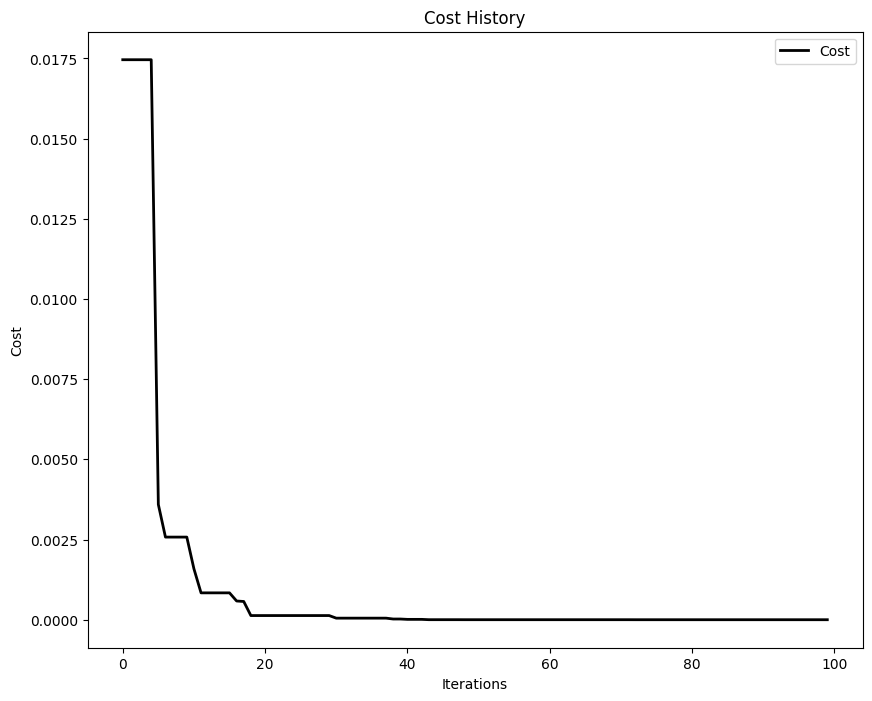

In [ ]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import plot_cost_history, plot_contour, plot_surface
import matplotlib.pyplot as plt
# Set-up optimizer
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=2, options=options)
optimizer.optimize(fx.sphere, iters=100)
# Plot the cost
plot_cost_history(optimizer.cost_history)
plt.show()

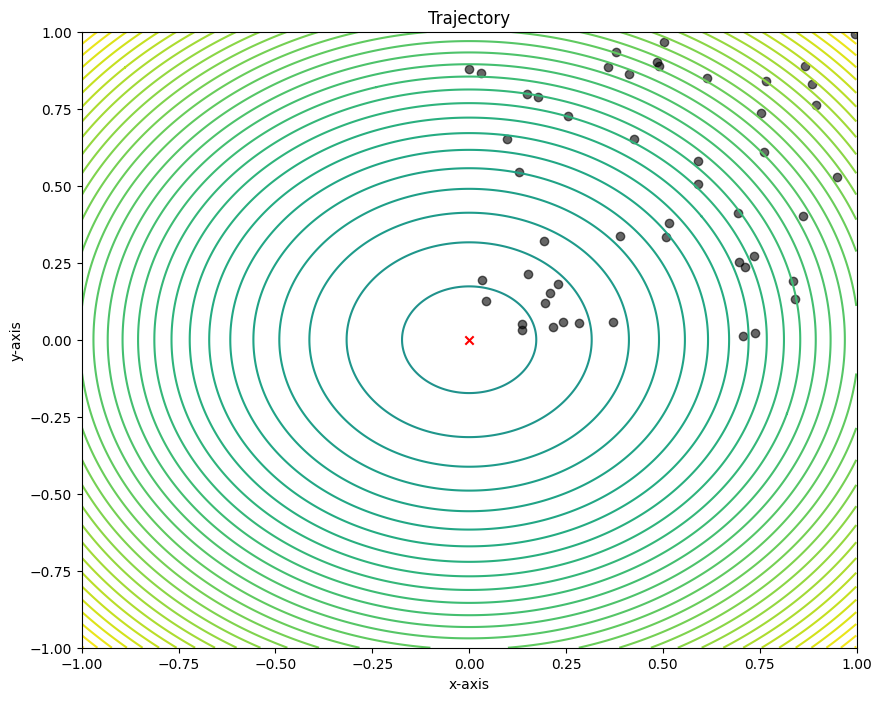

In [ ]:
from pyswarms.utils.plotters.formatters import Mesher, Designer
# Plot the sphere function's mesh for better plots
m = Mesher(func=fx.sphere,
           limits=[(-1,1), (-1,1)])
# Adjust figure limits
d = Designer(limits=[(-1,1), (-1,1), (-0.1,1)],
             label=['x-axis', 'y-axis', 'z-axis'])

plot_contour(pos_history=optimizer.pos_history, mesher=m, designer=d, mark=(0,0))

In [ ]:
!pip install numpy==1.23.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 40.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.1 which is incompatible.
tensorflow 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 1.23.1 which is incompatible.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.1 MB/s eta 0:00:00


GENETIC ALGORITHM

In [ ]:
import random
from deap import base, creator, tools, algorithms
from tensorflow.keras.layers import Dense, Flatten
from hyperparameter_opt import preprocess  # Import preprocess function from hyperparameter_opt.py
from inv_target import inv_target  # Import inv_target function
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Define the GA parameters
POPULATION_SIZE = 10
NUM_GENERATIONS = 2
CROSSOVER_PROB = 0.8
MUTATION_PROB = 0.2
HYPERPARAMETERS_RANGE = {
    'units': (10, 120),
    'layers': (1, 4),
}

LEARNING_RATES = [0.1, 0.01, 0.001]  # Restricted learning rates

# Define the fitness function
def evaluate(individual):
    units = individual[0]
    layers = individual[1]
    learning_rate = random.choice(LEARNING_RATES)  # Randomly choose from restricted learning rates

    # Preprocess data and train model using hyperparameters
    train_data = pd.read_csv('/content/data_example.csv')  # Update path as needed
    X_train, y_train, X_val, y_val, scaler = preprocess(train_data, quant=QUANTITY, seq=SEQ_LEN, fut=FUTURE)

    # Train your model using the hyperparameters
    model = Sequential()
    model.add(Flatten(input_shape=(4, 15)))  # Flatten the input to shape (None, 4*15)
    model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2, verbose=0)  # Example epochs

    # Evaluate model performance
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)

    return mse,

# Create the individual and population
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_units", random.randint, *HYPERPARAMETERS_RANGE['units'])
toolbox.register("attr_layers", random.randint, *HYPERPARAMETERS_RANGE['layers'])
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_units, toolbox.attr_layers), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.10)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

def main():
    pop = toolbox.population(n=POPULATION_SIZE)
    algorithms.eaSimple(pop, toolbox, cxpb=CROSSOVER_PROB, mutpb=MUTATION_PROB,
                        ngen=NUM_GENERATIONS, verbose=True)
    best_ind = tools.selBest(pop, 1)[0]
    best_units, best_layers = best_ind
    best_learning_rate = random.choice(LEARNING_RATES)
    print(f"Best Parameters found by GA - Units: {best_units}")
    print(f"Best Parameters found by GA - Layers: {best_layers}")
    print(f"Best Parameters found by GA - Learning Rate: {best_learning_rate}")


if __name__ == "__main__":
    main()


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
gen	nevals
0  	10    
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1  	10    
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Shape of training data: X (1552, 4, 15), y (1552, 1)
Shape of testing data: X (384, 4, 15), y (384, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2  	10    
Best Parameters found by GA - Units: 91
Best Parameters found by GA - Layers: 4
Best Parameters found by GA - Learning Rate: 0.001


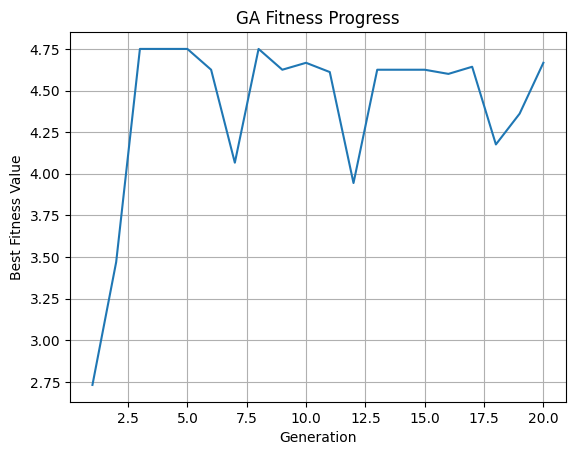

In [ ]:
import random
import matplotlib.pyplot as plt

# Define the GA parameters
POPULATION_SIZE = 50
NUM_GENERATIONS = 20
CROSSOVER_PROB = 0.8
MUTATION_PROB = 0.2
fitness_history = []  # To store best fitness value per generation

# Define a simple fitness function (example)
def fitness_function(individual):
    return sum(1 / (gene + 1) for gene in individual)  # Modified fitness function

# Initialize the population randomly
population = [random.choices(range(1, 11), k=10) for _ in range(POPULATION_SIZE)]  # Modified initialization

# Run the GA for a fixed number of generations
for gen in range(NUM_GENERATIONS):
    # Evaluate fitness for each individual in the population
    fitness_values = [fitness_function(individual) for individual in population]

    # Select the best individual and store its fitness value
    best_fitness = max(fitness_values)
    fitness_history.append(best_fitness)

    # Apply crossover and mutation operations
    for i in range(POPULATION_SIZE):
        if random.random() < CROSSOVER_PROB:
            crossover_point = random.randint(1, len(population[i])-1)
            crossover_value = random.choice(range(1, 11))  # Modified crossover value range
            population[i][:crossover_point] = [crossover_value] * crossover_point
        if random.random() < MUTATION_PROB:
            mutation_point = random.randint(0, len(population[i])-1)
            mutation_value = random.choice(range(1, 11))  # Modified mutation value range
            population[i][mutation_point] = mutation_value

# Plot the best fitness value over generations
plt.plot(range(1, NUM_GENERATIONS+1), fitness_history)
plt.xlabel('Generation')
plt.ylabel('Best Fitness Value')
plt.title('GA Fitness Progress')
plt.grid(True)
plt.show()


In [ ]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.0 MB/s eta 0:00:00


PSO

In [ ]:
!python hyperparameter_opt.py

2024-03-21 14:40:36.888634: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Shape of training data: X (3996, 4, 15), y (3996, 1)
Shape of testing data: X (996, 4, 15), y (996, 1)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
120               |120               |units
4                 |4                 |layers
tanh              |tanh              |activation function
0.01              |0.01              |learning rate

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - loss: 0.5965 - mae: 0.4021 - val_loss: 0.0380 - val_mae: 0.1412
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0372 - mae: 0.1450 - v

GA - SA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from deap import base, creator, tools, algorithms
from hyperparameter_opt import output_path, data_path, QUANTITY, SEQ_LEN, FUTURE, MAX_TRIALS, PATIENCE, EPOCHS, preprocess
import random

# Define the GA parameters
POPULATION_SIZE = 50
NUM_GENERATIONS = 20
CROSSOVER_PROB = 0.8
MUTATION_PROB = 0.2
HYPERPARAMETERS_RANGE = {
    'units': (10, 120),
    'layers': (1, 4),
    'learning_rate': (0.001, 0.1)
}

# Define the Simulated Annealing parameters
INITIAL_TEMPERATURE = 100.0
MIN_TEMPERATURE = 1.0
COOLING_RATE = 0.95

# Define the problem dimensions and hyperparameters range
NUM_DIMENSIONS = 3
HYPERPARAMETERS_RANGE = {
    'units': (10, 120),
    'layers': (1, 4),
    'learning_rate': (0.001, 0.1),
}

# Preprocess data and train model using hyperparameters
train_data = pd.read_csv('/content/data_example.csv')
X_train, y_train, X_val, y_val, scaler = preprocess(train_data, quant=QUANTITY, seq=SEQ_LEN, fut=FUTURE)

# Reshape the data if needed
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1] * X_val.shape[2]))


# Print shapes after reshaping
print("\nAfter Reshaping:")
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)

def anneal(best_ind, temperature):
    # Example annealing process
    new_ind = best_ind.copy()
    for i in range(len(new_ind)):
        if random.random() < temperature:
            new_ind[i] = random.uniform(HYPERPARAMETERS_RANGE[i][0], HYPERPARAMETERS_RANGE[i][1])
    return new_ind

# Define the fitness function
def evaluate(individual):
    units = individual[0]
    layers = individual[1]
    learning_rate = individual[2]

        # Create and compile the model

    model = Sequential()
    model.add(Dense(units, input_dim=X_train.shape[1], activation='relu'))  # Update input_dim to match feature dimension
    for _ in range(layers - 1):
        model.add(Dense(units, activation='relu'))
    model.add(Dense(1, activation='linear'))
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mse', metrics=['mae'])

    # Train the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, verbose=0)


    # Evaluate the model
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)

    return mse,

# Create the DEAP toolbox
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()
toolbox.register("attr_units", random.randint, *HYPERPARAMETERS_RANGE['units'])
toolbox.register("attr_layers", random.randint, *HYPERPARAMETERS_RANGE['layers'])
toolbox.register("attr_learning_rate", random.uniform, *HYPERPARAMETERS_RANGE['learning_rate'])
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_units, toolbox.attr_layers, toolbox.attr_learning_rate), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutPolynomialBounded, low=[10, 1, 0.001], up=[120, 4, 0.1], eta=3.0, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Define the main function
def main():
    population_size = 10
    num_generations = 20

    pop = toolbox.population(n=population_size)
    algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=num_generations, verbose=True)

    best_ind = tools.selBest(pop, 1)[0]
    best_units, best_layers, best_learning_rate = best_ind
    print(f"Best Parameters found by GA-SA - Units: {best_units}")
    print(f"Best Parameters found by GA-SA - Layers: {best_layers}")
    print(f"Best Parameters found by GA-SA - Learning Rate: {best_learning_rate}")

if __name__ == "__main__":
    main()


Best Parameters found by GA-SA - Units:  20
Best Parameters found by GA-SA - Layers: 2
Best Parameters found by GA-SA - Learning Rate: 0.1


WWO

In [ ]:
import numpy as np
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from deap import base, creator, tools, algorithms
from hyperparameter_opt import output_path, data_path, QUANTITY, SEQ_LEN, FUTURE, MAX_TRIALS, PATIENCE, EPOCHS, preprocess
import random

# Define the problem dimensions and hyperparameters range
NUM_DIMENSIONS = 3
HYPERPARAMETERS_RANGE = {
    'units': (10, 120),
    'layers': (1, 4),
    'learning_rate': (0.001, 0.1),
}

# Preprocess data and train model using hyperparameters
train_data = pd.read_csv('/content/data_example.csv')
X_train, y_train, X_val, y_val, scaler = preprocess(train_data, quant=QUANTITY, seq=SEQ_LEN, fut=FUTURE)


# Define the objective function to be minimized
def objective_function(x):
    return np.sum(np.square(x))

def water_waves_optimization(objective_function, num_variables, num_iterations, num_waves=10, damping_ratio=0.98):
    # Initialize the waves
    waves = np.random.rand(num_waves, num_variables)  # Random initial positions of waves
    best_position = None
    best_fitness = float('inf')

    for iteration in range(num_iterations):
        for i in range(num_waves):
            # Update the position of the wave
            new_position = waves[i] + np.random.normal(0, 1, size=num_variables)

            # Reflect the wave if it goes beyond the search space
            new_position = np.clip(new_position, 0, 1)

            # Calculate fitness of the new position
            fitness = objective_function(new_position)

            # Update the wave if the new position is better
            if fitness < objective_function(waves[i]):
                waves[i] = new_position

                # Update the global best if needed
                if fitness < best_fitness:
                    best_position = new_position
                    best_fitness = fitness

        # Damping to reduce oscillations
        waves *= damping_ratio

    return best_position, best_fitness

if __name__ == "__main__":
    num_variables = 3  # Number of hyperparameters
    num_iterations = 100  # Number of iterations
    num_waves = 10  # Number of waves in the search space
    damping_ratio = 0.98
    best_solution, best_fitness = water_waves_optimization(objective_function, num_variables, num_iterations)

    # Map best_solution to hyperparameters range
    units_range = (10, 120)
    layers_range = (1, 4)
    learning_rate_range = (0.001, 0.1)

    best_units = int(best_solution[0] * (units_range[1] - units_range[0]) + units_range[0])
    best_layers = int(best_solution[1] * (layers_range[1] - layers_range[0]) + layers_range[0])
    best_learning_rate = best_solution[2] * (learning_rate_range[1] - learning_rate_range[0]) + learning_rate_range[0]

    print("Best Parameters found by WWO - Units:", best_units)
    print("Best Parameters found by WWO - Layers:", best_layers)
    print("Best Parameters found by WWO - Learning Rate:", best_learning_rate)

Best Parameters found by WWO - Units: 121
Best Parameters found by WWO - Layers: 5
Best Parameters found by WWO - Learning Rate: 0.001


after optimizations

GA - SA reults

In [ ]:
!python hyperparameter_opt.py

2024-03-21 14:28:20.964855: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Shape of training data: X (3996, 4, 15), y (3996, 1)
Shape of testing data: X (996, 4, 15), y (996, 1)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
19                |19                |units
1                 |1                 |layers
tanh              |tanh              |activation function
0.1               |0.1               |learning rate

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.5166 - mae: 0.4151 - val_loss: 0.0355 - val_mae: 0.1303
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0306 - mae: 0.1269 - val_

WWO results

In [ ]:
!python hyperparameter_opt.py

2024-03-21 13:51:17.109581: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Shape of training data: X (3996, 4, 15), y (3996, 1)
Shape of testing data: X (996, 4, 15), y (996, 1)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
120               |120               |units
4                 |4                 |layers
tanh              |tanh              |activation function
0.001             |0.001             |learning rate

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - loss: 0.2003 - mae: 0.3259 - val_loss: 0.0711 - val_mae: 0.2028
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0413 - mae: 0.1598 - v

PSO - 0.015
GA - SA - 0.018
WWO - 0.026
GA - 0.28

before opt - 0.091 , 0.077

GA-SA - 0.07, WWO - 0.084, hyperopt - 0.079, PSO - 0.07

In [ ]:
!python hyperparameter_opt.py

2024-03-21 13:40:32.326089: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Shape of training data: X (3996, 4, 15), y (3996, 1)
Shape of testing data: X (996, 4, 15), y (996, 1)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
91                |91                |units
3                 |3                 |layers
tanh              |tanh              |activation function
0.1               |0.1               |learning rate

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - loss: 1.7914 - mae: 0.7460 - val_loss: 0.1762 - val_mae: 0.3165
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0990 - mae: 0.2426 - v